# Методы машинного обучения.

## ЛР9. - Эволюционные алгоритмы.

Вариант 1. Для оптимальной степени полинома, найденной в ЛР1 (задание1), найти значения коэффициентов с использованием эволюционного алгоритма. Визуализировать процесс обучения по эпохам. Сравнить найденные значения с результатами, полученными методом наименьших квадратов.

Вариант 2. Предложить какую-то другую задачу для решения с использованием эволюционного алгоритма.

Вариант 1 для слабачков, поэтому сейчас будет генетическая кластеризация.

In [ ]:
import numpy
import sklearn.datasets
!pip install pygad
import pygad
from sklearn.metrics import pairwise_distances
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

import umap
!pip install umap-learn[plot]
import umap.plot
from umap import UMAP
from sklearn.metrics import adjusted_rand_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 50.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,

In [ ]:
images, target = sklearn.datasets.load_digits(return_X_y=True, as_frame=True)
print(images.shape)

import numpy as np

X, y_true = images, target.astype(int)
X = X.astype(np.float32) / 255.0

(1797, 64)


In [ ]:
umap_3d_embeddings = UMAP(n_components=3, random_state=7).fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
def euclidean_distance(X, Y):
    return numpy.sqrt(numpy.sum(numpy.power(X - Y, 2), axis=1))

def cluster_data(solution, solution_idx):
    global num_clusters, feature_vector_length, data
    cluster_centers = []
    all_clusters_dists = []
    clusters = []
    clusters_sum_dist = []

    for clust_idx in range(num_clusters):
        cluster_centers.append(solution[feature_vector_length*clust_idx:feature_vector_length*(clust_idx+1)])
        cluster_center_dists = euclidean_distance(data, cluster_centers[clust_idx])
        all_clusters_dists.append(numpy.array(cluster_center_dists))

    cluster_centers = numpy.array(cluster_centers)
    all_clusters_dists = numpy.array(all_clusters_dists)

    cluster_indices = numpy.argmin(all_clusters_dists, axis=0)
    for clust_idx in range(num_clusters):
        clusters.append(numpy.where(cluster_indices == clust_idx)[0])
        if len(clusters[clust_idx]) == 0:
            clusters_sum_dist.append(0)
        else:
            clusters_sum_dist.append(numpy.sum(all_clusters_dists[clust_idx, clusters[clust_idx]]))

    clusters_sum_dist = numpy.array(clusters_sum_dist)

    return cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist

def fitness_func(ga_instance, solution, solution_idx):
    _, _, cluster_indices, _, clusters_sum_dist = cluster_data(solution, solution_idx)

    #fitness = 1.0 / (numpy.sum(clusters_sum_dist) + 0.00000001)

    return adjusted_rand_score(y_true, cluster_indices)

In [ ]:
data = umap_3d_embeddings
num_clusters = 10
feature_vector_length = data.shape[1]
num_genes = num_clusters * feature_vector_length

ga_instance = pygad.GA(num_generations=500,
                       sol_per_pop=60,
                       init_range_low=-10,
                       init_range_high=20,
                       num_parents_mating=50,
                       keep_parents=40,
                       num_genes=num_genes,
                       fitness_func=fitness_func)

ga_instance.run()

best_solution, best_solution_fitness, best_solution_idx = ga_instance.best_solution()
print("Best solution is {bs}".format(bs=best_solution))
print("Fitness of the best solution is {bsf}".format(bsf=best_solution_fitness))
print("Best solution found after {gen} generations".format(gen=ga_instance.best_solution_generation))

cluster_centers, all_clusters_dists, cluster_indices, clusters, clusters_sum_dist = cluster_data(best_solution, best_solution_idx)
print(f'Clusters: {np.unique(cluster_indices)}')
print(f'ARI: {adjusted_rand_score(y_true, cluster_indices)}')
print(f'DBI: {davies_bouldin_score(data, cluster_indices)}')
print(f'Silhouette: {silhouette_score(data, cluster_indices, random_state=7)}')
print(f'Calinski Harabasz: {calinski_harabasz_score(data, cluster_indices)}')

Best solution is [ 4.60108392 18.95761518  7.8848612  12.84608929 -2.64638753  9.96044794
  0.54542362  5.25243501 14.50161539  6.10224369 -3.08642216  0.79640329
 -7.77744507  8.23454268  5.00801472 -3.31389972 14.45131743 11.87862822
 -8.21661072  4.79084349  8.78141711  7.65728133 -2.38088495  6.64817846
 13.03863883  6.05993721 -8.808084   -4.28877743  6.44835485 14.52610344]
Fitness of the best solution is 0.8481327134346331
Best solution found after 370 generations
Clusters: [0 1 2 3 4 5 6 7 8 9]
ARI: 0.8481327134346331
DBI: 0.27891871454022465
Silhouette: 0.7959372401237488
Calinski Harabasz: 10033.279296875


In [ ]:
def class_purity(y_true, y_pred, cls):
    class_mask = (y_true == cls)
    class_predictions = y_pred[class_mask]
    cluster_counts = Counter(class_predictions)
    purity = max(cluster_counts.values()) / len(class_predictions)
    return purity

def plot_clustering(title, X, y_true, y_pred, metric):
    fig, plots = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle(title)
    plt.prism()

    n_clusters = len(np.unique(y_true))
    purities = []

    ax = fig.add_subplot(2, 2, 1, projection='3d') if X.shape[1] == 3 else plots[0, 0]
    for i in range(n_clusters):
        digit_indices = (y_true == i)
        purities.append(class_purity(y_true, y_pred, i))
        dims = [X[digit_indices, i] for i in range(X.shape[1])]
        ax.set_title('Original')
        ax.scatter(*dims, label=f"Digit {i}")
        ax.legend()

    purities.append(np.average(purities))

    avg_dist = np.zeros((n_clusters, n_clusters))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y_true == i], X[y_true == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    sns.heatmap(avg_dist, ax=plots[1, 0], annot=True, cmap='Reds', xticklabels=np.arange(n_clusters), yticklabels=np.arange(n_clusters))

    inner_distances = [avg_dist[i, i] for i in range(n_clusters)]
    inner_distances.append(np.average(inner_distances))
    sns.heatmap([inner_distances, purities], ax=plots[1, 1], annot=True, cmap='Reds', xticklabels=[*np.arange(n_clusters), 'avg'], yticklabels=['inner distance', 'purity'])

    n_clusters = len(np.unique(y_pred))

    ax = fig.add_subplot(2, 2, 2, projection='3d') if X.shape[1] == 3 else plots[0, 1]
    for i in range(n_clusters):
        digit_indices = (y_pred == i)
        dims = [X[digit_indices, i] for i in range(X.shape[1])]
        ax.set_title('Prediction')
        ax.scatter(*dims, label=f"Cluster {i}")
        ax.legend()

    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

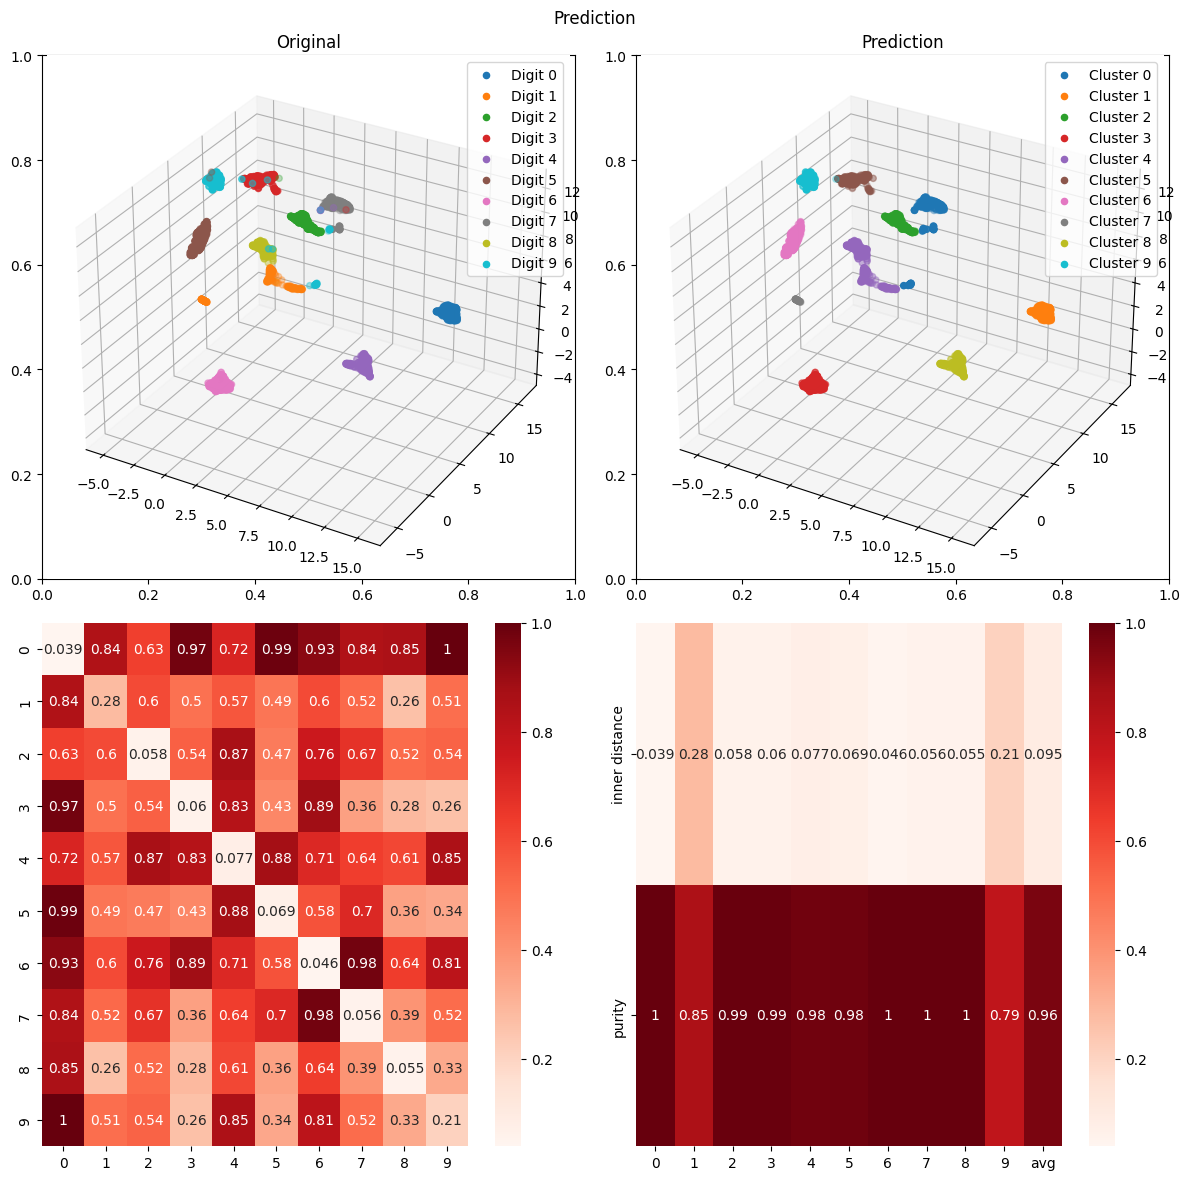

/usr/local/lib/python3.11/dist-packages/pygad/visualize/plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


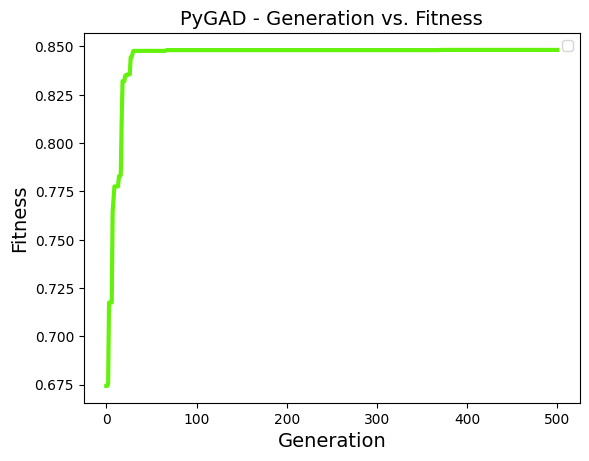

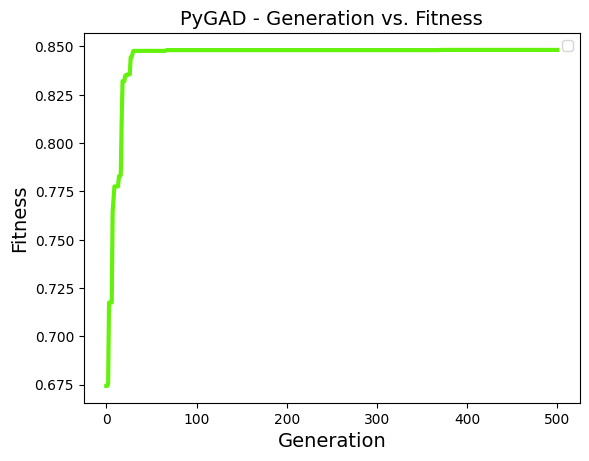

In [ ]:
plot_clustering('Prediction', data, y_true, cluster_indices, 'euclidean')
ga_instance.plot_fitness()